# Fixed Income HW2

Cohort 1 Group 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df_data,tnote_data=pd.read_excel('Homework_2_Data.xlsx',sheet_name=None).values()

# Question 1
Using the raw STRIPS data in the spreadsheet, graph the spot curve and the 3-month forward curve out to the longest maturity of the data (about 25 years).

$
D(T)=\frac{1}{(1+\frac{r}{2})^{2T}}
$

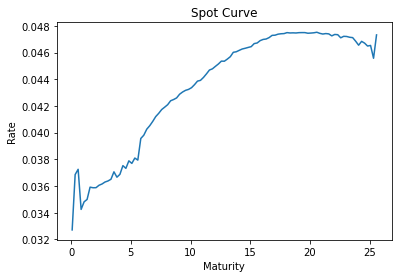

In [2]:
df_data['Dt']=df_data['Price']/100
df_data['r']=(pow(1/df_data['Dt'],1/(df_data['Maturity']*2))-1)*2
plt.plot(df_data.set_index('Maturity').r)
plt.title('Spot Curve')
plt.ylabel('Rate')
plt.xlabel('Maturity')
plt.show()

$
1 + m \times n f_m = \frac{D(n)}{D(n + m)}
$

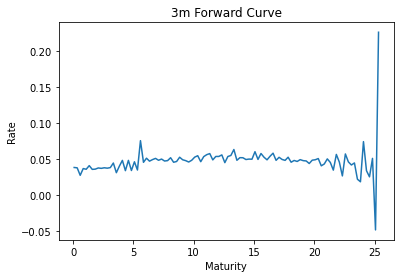

In [3]:
df_data['3m forward']=(df_data['Dt']/df_data['Dt'].shift(-1)-1)/0.25
plt.plot(df_data.set_index('Maturity')['3m forward'])
plt.title('3m Forward Curve')
plt.ylabel('Rate')
plt.xlabel('Maturity')
plt.show()

# Question 2
Assume that the discount function can be expressed by the following polynomial function
$
D(T) = exp(aT + bT^2 + cT^3 + dT^4 + eT^5)
$
Using the STRIPS data, estimate the coefficients a, b, c, d, and e by regressing the log of D(T) on the indicated powers of T. Do not include an intercept (constant) term in the regression.

In [4]:
X=pd.concat([df_data['Maturity'],df_data['Maturity']**2,df_data['Maturity']**3,df_data['Maturity']**4,df_data['Maturity']**5],axis=1)
X.columns=['T1','T2','T3','T4','T5']
y=np.log(df_data['Dt'])
mdl=LinearRegression(fit_intercept=False)
mdl.fit(X,y)
mdl.coef_

array([-3.26280480e-02, -1.07470383e-03, -1.98120131e-05,  2.82367181e-06,
       -4.68174298e-08])

# Question 3
Plug the estimated coefficients back into the D(T) function and graph the resulting spot curve at semiannual frequencies out to 25 years.

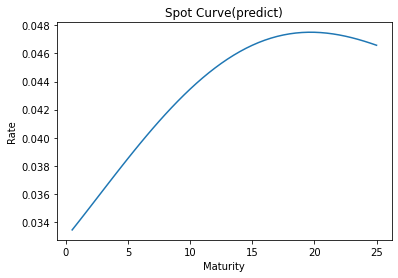

In [5]:
x=np.arange(0.5,25.5,0.5)
x=np.array([x,x**2,x**3,x**4,x**5]).T
log_dt_pred=mdl.predict(x)
r_pred=(pow(1/np.exp(log_dt_pred),1/(x[:,0]*2))-1)*2

pred_data=pd.DataFrame(data={'Maturity': x[:, 0],
                             'Dt':np.exp(log_dt_pred),
                             'r':r_pred})
plt.plot(pred_data.set_index('Maturity')['r'])
plt.title('Spot Curve(predict)')
plt.ylabel('Rate')
plt.xlabel('Maturity')
plt.show()

# Question 4
Using the estimated discount function, solve for the par rates at semiannual frequencies out to 25 years. Graph these rates.
$
100=\frac{c}{2}\sum^{2T}_{i=1}D(i/2)+100D(T) \\
c=2\frac{100-100D(T)}{\sum^{2T}_{i=1}D(i/2)}
$

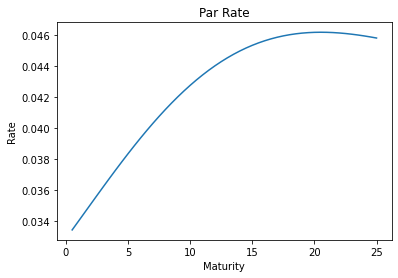

,Maturity,Dt,r,par rate
0,0.5,0.983552,0.033447,0.033447
1,1.0,0.966842,0.034006,0.034001
2,1.5,0.949886,0.034571,0.034558
3,2.0,0.932702,0.035140,0.035115
4,2.5,0.915311,0.035711,0.035671
5,3.0,0.897741,0.036283,0.036223
6,3.5,0.880017,0.036854,0.03677
7,4.0,0.862172,0.037421,0.03731
8,4.5,0.844236,0.037983,0.037841
9,5.0,0.826243,0.038540,0.038362


In [6]:
pred_data['par rate']=None
for i in range(len(pred_data)):
    pred_data.loc[i,'par rate']=2*((1-pred_data.loc[i,'Dt'])/pred_data.loc[:i,'Dt'].sum())
plt.plot(pred_data.set_index('Maturity')['par rate'])
plt.title('Par Rate')
plt.ylabel('Rate')
plt.xlabel('Maturity')
plt.show()

pred_data

# Question 5
Using the estimated discount function, solve for the 6-month forward rates at semiannual frequencies out to 25 years. Graph these rates.

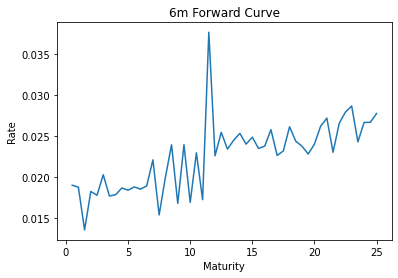

In [22]:
pred_data['6m forward']=(df_data['Dt']/df_data['Dt'].shift(-1)-1)/0.5
plt.plot(pred_data.set_index('Maturity')['6m forward'])
plt.title('6m Forward Curve')
plt.ylabel('Rate')
plt.xlabel('Maturity')
plt.show()

# Question 6
Assume that the par curve for maturity T is given by the following function
$
Y (T) = a + bT + cT^2 + dT^3 + eT^4 + fT^5
$
Using the Treasury note and bond data, bootstrap the spot curve. To make things easier, you can assume that each of the bonds is priced at par. From this bootstrapped curve, graph the resulting spot curve, par curve, and 6 month forward curve out to 25 years.

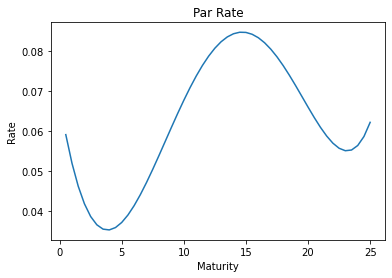

In [27]:
X=pd.concat([tnote_data['Maturity'],tnote_data['Maturity']**2,tnote_data['Maturity']**3,tnote_data['Maturity']**4,tnote_data['Maturity']**5],axis=1)
X.columns=['T1','T2','T3','T4','T5']
y=tnote_data['Coupon']/100
mdl=LinearRegression(fit_intercept=True)
mdl.fit(X,y)
mdl.coef_

x=np.arange(0.5,25.5,0.5)
x=np.array([x,x**2,x**3,x**4,x**5]).T
par_rate=mdl.predict(x)

pred_data=pd.DataFrame(data={'Maturity': x[:, 0],
                             'par rate': par_rate})
plt.plot(pred_data.set_index('Maturity')['par rate'])
plt.title('Par Rate')
plt.ylabel('Rate')
plt.xlabel('Maturity')
plt.show()

# Question 7
Compare the spot, par, and forward curves from fitting the STRIPS curve with those from fitting the par curve. What do you attribute the difference to?